In [1]:
import pandas as pd
import numpy as np

# **Loading the dataset**

In [2]:
data = pd.read_csv('/content/50_Startups.csv')
data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#**Visualization**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

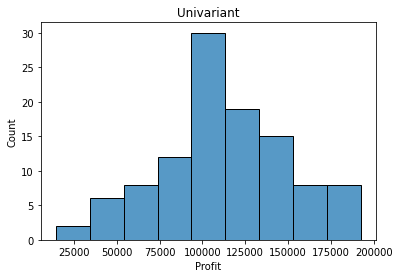

In [4]:
# Univariant
sns.histplot(data['Profit'])
plt.title('Univariant')
plt.show()

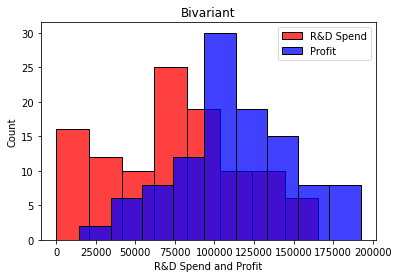

In [5]:
#Bivariant
sns.histplot(data['R&D Spend'], color='red', label='R&D Spend')
sns.histplot(data['Profit'],color='blue', label='Profit')
plt.xlabel('R&D Spend and Profit')
plt.legend()
plt.title("Bivariant")
plt.show()

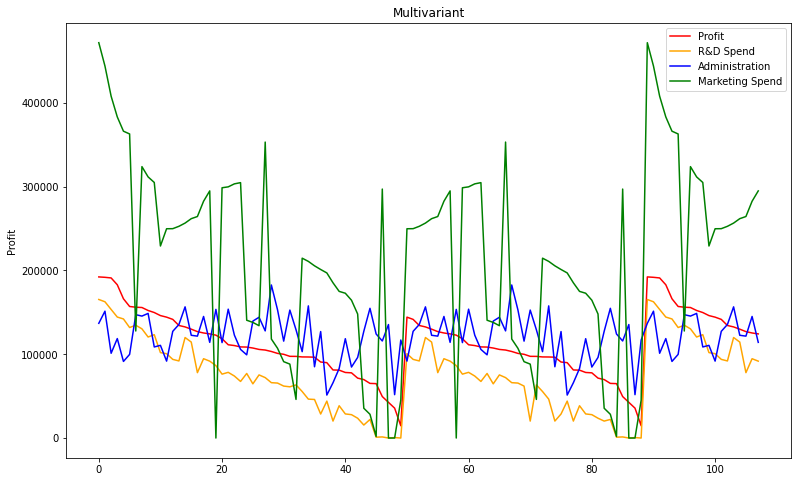

In [6]:
#MultiVariant
plt.figure(figsize=(13,8))
sns.lineplot(data=data['Profit'], color='red', label='Profit')
sns.lineplot(data=data['R&D Spend'], color='orange', label='R&D Spend')
sns.lineplot(data =data['Administration'], color='blue',label='Administration')
sns.lineplot(data=data['Marketing Spend'], color='green', label='Marketing Spend')
plt.legend()
plt.title('Multivariant')
plt.show()

#**Descriptive Statistics**

In [7]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
data.State.describe() #Descriptive for categorical value

count          108
unique           3
top       New York
freq            39
Name: State, dtype: object

#**Handling Missing Values**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [10]:
data.isnull().any() #No missing values in the data

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

#**Outliers**

## Visualisation

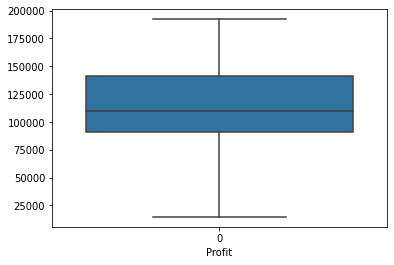

In [11]:
sns.boxplot(data = data['Profit'])
plt.xlabel('Profit')
plt.show()

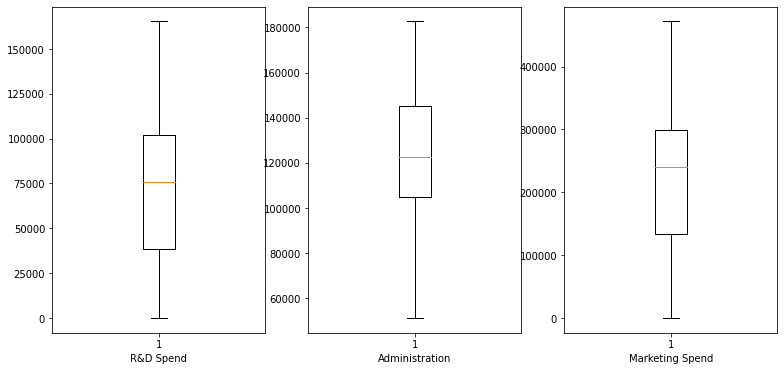

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3, figsize=(13,6))
ax1.boxplot(data['R&D Spend'])
ax1.set_xlabel('R&D Spend')
ax2.boxplot(data['Administration'])
ax2.set_xlabel('Administration')
ax3.boxplot(data['Marketing Spend'])
ax3.set_xlabel('Marketing Spend')
plt.show()

## Statistical Method

In [13]:
def find_outilers(data):
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1 
  outlier = data[((data < (q1 -1.5*iqr)) | (data > (q3+1.5*iqr)))] 
  return outlier

print(find_outilers(data['Profit']))
print(find_outilers(data['Administration']))
print(find_outilers(data['R&D Spend']))
print(find_outilers(data['Marketing Spend']))

Series([], Name: Profit, dtype: float64)
Series([], Name: Administration, dtype: float64)
Series([], Name: R&D Spend, dtype: float64)
Series([], Name: Marketing Spend, dtype: float64)


The above **boxplot** and the **statistics method** shows that their is **No Outliers**.

#**Encoding Categorical Data**

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
data['State'] = le.fit_transform(data.State)

In [17]:
data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


#**Splitting Data into independent and dependent**

In [18]:
X = data.iloc[:,:4]
y = data['Profit']

In [19]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [20]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

#**Scaling the independent variable**

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
X = X.values
y = y.values

In [23]:
X[:4] #Before Scaling the independent variable

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 2.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 1.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 2.0000000e+00]])

In [24]:
scaler = MinMaxScaler()

In [25]:
X = scaler.fit_transform(X)

In [26]:
X[:4] #After Scaling the independent variable

array([[1.        , 0.65174393, 1.        , 1.        ],
       [0.98335946, 0.76197173, 0.94089337, 0.        ],
       [0.92798459, 0.37957895, 0.8646636 , 0.5       ],
       [0.87313643, 0.51299839, 0.81223513, 1.        ]])

#**Splitting the data to training and testing**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
len(X), len(y) #Before splitting data

(108, 108)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=4)

In [30]:
len(X_train),len(X_test),len(y_train),len(y_test) #After splitting data

(75, 33, 75, 33)